## Lorenzo Nastri

### lorenzonastri@gmail.com
### https://www.linkedin.com/in/lorenzo-nastri
### https://lnastri25.github.io/projects/

# Gregors

## Contexto
Gregors es un producto B2B2C y colabora con prestamistas y agencias de verificación de antecedentes para satisfacer las necesidades de verificación de ingresos y empleo.
Como parte de este proceso, el usuario final accede al widget de Gregors incrustado en el portal de nuestro cliente o a un formulario de pedido enviado por correo electrónico o SMS, donde realiza lo siguiente:

1. Buscar su empleador actual.

2. Cuando un usuario comienza a escribir, utilizamos nuestra base de datos interna de empleadores; si no se encuentra el empleador, se le presentan al usuario los resultados de la API de Google (primeras dos filas) o la entrada manual (última fila), consulte la captura de pantalla a continuación.

3. Una vez que un usuario selecciona un empleador, puede ver la pantalla de inicio de sesión del proveedor de nómina (empleadores mapeados) o ver una lista de proveedores de nómina.

4. Una vez que un usuario envía sus credenciales, termina en "Éxito" o "Error" cuando se despide.

| Variable                                | Muestra                     | Descripción                                                                                                  |
|-----------------------------------------|-----------------------------|--------------------------------------------------------------------------------------------------------------|
| Dominio del Cliente                     | A                           | Nombre del Cliente                                                                                           |
| Zona horaria del teléfono del usuario   | Desconocido                 | Zona horaria del dispositivo del usuario (Desconocido: no pudimos capturar la zona horaria)                  |
| Creado en                               | 2023-03-27T20:44:47.283091Z | Fecha en que se creó el pedido                                                                              |
| Clics en el correo electrónico          | 0                           | Clics en enlaces de correo electrónico                                                                      |
| Correos electrónicos abiertos           | 0                           | Correos electrónicos abiertos                                                                               |
| Correos electrónicos                    | 4                           | Correos electrónicos enviados                                                                               |
| Caducado                                | 1                           | Número de pedidos caducados                                                                                |
| Estado del embudo de pedido             | 2-Notificación enviada      | Estado del pedido                                                                                            |
| SMS                                     | 0                           | SMS enviado                                                                                                 |
| Clics en SMS                            | 0                           | SMS clickeados                                                                                              |
| SMS abiertos                            | 0                           | SMS abiertos                                                                                                |
| Grupo de orden de plataformas - Orden → Gerente | masked@order_manager.org    | Correo electrónico del gerente de pedidos                                                                    |
| Grupo de orden de plataformas - Orden → Origen | interno                   |                                                                                                              |
| order_has_user_email                    | TRUE                        | Si el correo electrónico del usuario estaba presente en el formulario de pedido (se usa para contactar al usuario y pedirle que verifique). |
| order_has_user_phone                    | FALSE                       | Si el teléfono del usuario estaba presente en el formulario de pedido (se usa para contactar al usuario y pedirle que verifique).       |

La variable "Estado del embudo de pedido" realiza un seguimiento de las siguientes acciones de los usuarios:
1. Creado: se crea el pedido.
2. Notificación enviada: se envía una notificación al usuario que desea verificar su información.
3. Notificación abierta: el usuario abre la notificación.
4. Clic en la notificación: se hace clic en el enlace dentro del correo/mensaje (este enlace abre nuestro widget).
5. Widget cargado: el usuario carga el widget.
6. Empleador seleccionado: el usuario busca y selecciona un empleador.
7. Vista del inicio de sesión del proveedor: el usuario ve la página de inicio de sesión del proveedor.
8. Envío de inicio de sesión: el usuario envía sus credenciales.
9. Completado: el usuario puede iniciar sesión con éxito en su empleador y verificar su información.

## Declaración del Problema
Nuestra métrica principal es la "Tasa de Conversión", que es la proporción de usuarios que completan con éxito una verificación (Estado del embudo de pedido = "9-Completado").

**Uno de nuestros clientes se comunica que hay una disminución en la Tasa de Conversión y desea recomendaciones sobre cómo mejorarla.**

## Tarea
Analiza el siguiente conjunto de datos y:
* Determina si la tasa de conversión ha disminuido y, de ser así, explique por qué ha disminuido.
* Proporciona recomendaciones sobre cómo mejorar la tasa de conversión.

## Entregables
Presentación con hallazgos y recomendaciones.
Propuesta sobre cómo evitar que esto suceda en el futuro.

## Presentación
Utiliza el Principio de la Pirámide para estructurar tus hallazgos en una presentación de PowerPoint de 5 diapositivas.

→ Enlace a la presentación: https://docs.google.com/presentation/d/1IXSj5nAuwQev4QEKfBgfUxVfIBx1drGDFpCs-lStja8/edit?usp=sharing

## Dataset

https://docs.google.com/spreadsheets/d/1appaNdbUMIMlA_j6bgnlCWURon7TODALquTU-UyGmoY/edit?usp=sharing


In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Primer Paso: Validación de Datos
**Objetivo:**
Antes de sumergirse en cualquier análisis, el primer y más importante paso es validar el conjunto de datos en cuanto a su integridad, consistencia y completitud. Esto es crucial para garantizar que los análisis e ideas subsiguientes se basen en datos confiables.

Acciones a Tomar:
1. Verificar Valores Ausentes: Identificar cualquier valor ausente o nulo en el conjunto de datos que podría afectar el análisis. Esto es especialmente importante para variables clave como 'Order Funnel State', 'Email Clicks', 'Email Opens', etc.

2. Consistencia de Embudos: Validar el flujo lógico del 'Order Funnel State'. Por ejemplo, un pedido no debería estar en el estado de 'Notification Clicked' sin haber pasado antes por los estados de 'Notification Sent' y 'Notification Opened'.

3. Métricas de Correo Electrónico y SMS: Examinar las variables relacionadas con correo electrónico y SMS para identificar posibles inconsistencias. Por ejemplo, no debería haber 'Email Clicks' sin 'Email Opens' y 'Emails Sent' correspondientes.

¿Por Qué Este Paso es Importante?:
* Integridad de Datos: Asegurar que no haya puntos de datos faltantes o inconsistentes permite un análisis más preciso y confiable.

* Identificar Anomalías: La identificación temprana de cualquier inconsistencia o anomalía ayudará a corregir los datos o tener en cuenta tales problemas en el análisis.

* Fundamento para el Análisis: Un conjunto de datos validado sienta las bases para los pasos subsiguientes en el análisis, garantizando que las ideas y recomendaciones sean dignas de confianza.

Al validar meticulosamente los datos, establecemos el escenario para un análisis sólido con el objetivo de comprender la disminución en la Tasa de Conversión (CR) y proponer recomendaciones accionables para mejorarla.

In [321]:
df = pd.read_csv("gregors.csv")

# Validación de Datos

In [322]:
from data_validation import validate_columns
validate_columns(df)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Client Domain,1,4090,0,0.000000,"[A, A, A, A, A]"
User Phone Timezone,8,4090,0,0.000000,"[CST, CST, PST, EST, CST]"
Created At,4090,4090,0,0.000000,"[2022-11-29T16:23:10.560626Z, 2023-01-13T22:27..."
Email Clicks,NaN,4090.0,0,0.000000,"[0, 0, 0, 0, 0]"
Email Opens,NaN,4090.0,0,0.000000,"[0, 0, 0, 0, 0]"
Emails,NaN,4074.0,16,0.391198,"[4.0, 0.0, 0.0, 0.0, 0.0]"
Expired,NaN,4090.0,0,0.000000,"[1, 0, 0, 1, 1]"
Order Funnel State,9,4090,0,0.000000,"[2-Notification sent, 8-Submitted login, 9-Com..."
Sms,NaN,4074.0,16,0.391198,"[1.0, 1.0, 1.0, 1.0, 1.0]"
Sms Clicks,NaN,4090.0,0,0.000000,"[0, 1, 1, 0, 0]"


In [323]:
df["User Phone Timezone"].value_counts(normalize=True)

User Phone Timezone
CST        0.577017
EST        0.313447
Unknown    0.061125
PST        0.031296
MST        0.013203
AST        0.001956
UTC-10     0.001222
UTC-9      0.000733
Name: proportion, dtype: float64

In [324]:
df_sample = df.sample(10)

In [325]:
df_sample["User Phone Timezone"].value_counts(normalize=True)

User Phone Timezone
CST    0.8
PST    0.1
EST    0.1
Name: proportion, dtype: float64

## Tratamiento de Faltantes



In [326]:
df[df["Sms"].isna()][["Order Funnel State","Email Opens","Sms Opens"]].value_counts()

Order Funnel State  Email Opens  Sms Opens
1-Created           0            0            16
Name: count, dtype: int64

In [327]:
df[df["Emails"].isna()][["Order Funnel State","Email Opens","Sms Opens"]].value_counts()

Order Funnel State  Email Opens  Sms Opens
1-Created           0            0            16
Name: count, dtype: int64

Tenemos valores faltantes en Emails/Sms en una etapa temprana del embudo y también el porcentaje de valores faltantes es muy bajo y no hay casos extremos. Por lo tanto, podemos eliminar esos ejemplos.

In [328]:
df = df.dropna(subset="Emails")
df[df["Emails"].isna()].shape

(0, 15)

In [329]:
df.dropna(subset="Sms",inplace=True)

In [330]:
df.Sms.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
4085    False
4086    False
4087    False
4088    False
4089    False
Name: Sms, Length: 4074, dtype: bool

In [331]:
df = df.dropna(subset="Sms")

## Tipos de Datos

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 0 to 4089
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Client Domain                            4074 non-null   object 
 1   User Phone Timezone                      4074 non-null   object 
 2   Created At                               4074 non-null   object 
 3   Email Clicks                             4074 non-null   int64  
 4   Email Opens                              4074 non-null   int64  
 5   Emails                                   4074 non-null   float64
 6   Expired                                  4074 non-null   int64  
 7   Order Funnel State                       4074 non-null   object 
 8   Sms                                      4074 non-null   float64
 9   Sms Clicks                               4074 non-null   int64  
 10  Sms Opens                                4074 non-nul

Podemos ver el balance de las columnas categóricas

In [333]:
df["Client Domain"].value_counts()

Client Domain
A    4074
Name: count, dtype: int64

In [334]:
df["order_has_user_email"].value_counts()

order_has_user_email
False    2736
True     1338
Name: count, dtype: int64

In [335]:
df["order_has_user_phone"].value_counts()

order_has_user_phone
True     3835
False     239
Name: count, dtype: int64

Hay ordenes que no tienen ni telefono ni email. Necesitamos chequear esa posible inconsistencia

In [336]:
df[["order_has_user_phone","order_has_user_email"]].value_counts()

order_has_user_phone  order_has_user_email
True                  False                   2736
                      True                    1099
False                 True                     239
Name: count, dtype: int64

## Consistencia del Funnel

Extraemos el orden numérico del estado del funell

In [337]:
df['Order Funnel State'].value_counts()

Order Funnel State
2-Notification sent        996
8-Submitted login          869
9-Completed                627
7-Viewed provider login    609
6-Employer selected        395
5-Widget loaded            291
3-Notification opened      150
4-Notification click       137
Name: count, dtype: int64

In [338]:
"3-Notification opened".split("-")[0]

'3'

In [339]:
def separar_guion(x):
    return x.split("-")[0]

df['Order Funnel State'].apply(separar_guion)

0       2
1       3
2       8
3       5
4       8
       ..
4085    8
4086    9
4087    9
4088    8
4089    6
Name: Order Funnel State, Length: 4074, dtype: object

In [340]:
df['funnel_order'] = df['Order Funnel State'].apply(lambda x: int(x.split('-')[0]))
df['funnel_order'].value_counts()

funnel_order
2    996
8    869
9    627
7    609
6    395
5    291
3    150
4    137
Name: count, dtype: int64

No esperamos tener un Sms no enviado == 0, y un Sms abierto. Tampoco esperamos un Sms abierto y no hacer clic

In [341]:
print(sorted(df['Order Funnel State'].unique()))

['2-Notification sent', '3-Notification opened', '4-Notification click', '5-Widget loaded', '6-Employer selected', '7-Viewed provider login', '8-Submitted login', '9-Completed']


**Funnel Inconsistente** 
* '3-Notification opened': Las filas con funnel >2 y sin emails Open.

* '4-Notification click': Las filas con funnel >3 y sin emails Click.

In [342]:
Emails_enviados = df.groupby(['funnel_order', 'Emails']).agg(contar_abiertos=('Email Opens', 'sum'), contar_clicks=('Email Clicks', 'sum')).reset_index()
Emails_enviados

,funnel_order,Emails,contar_abiertos,contar_clicks
0,2,0.0,0,0
1,2,1.0,0,0
2,2,2.0,0,0
3,2,4.0,0,0
4,3,1.0,2,0
5,3,4.0,409,0
6,4,0.0,0,0
7,4,1.0,2,3
8,4,4.0,29,6
9,5,0.0,0,0


In [343]:
Sms_enviados = df.groupby(['funnel_order', 'Sms']).agg(contar_abiertos=('Sms Opens', 'sum'), contar_clicks=('Sms Clicks', 'sum')).reset_index()

### Emails enviados == 0

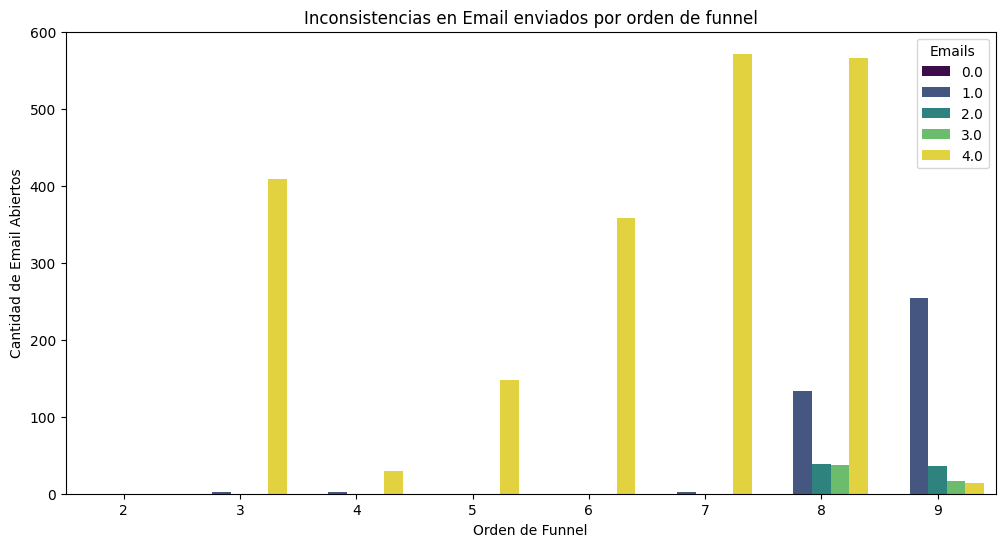

In [344]:
# Grafiando inconsistencias en Emails
plt.figure(figsize=(12, 6))
sns.barplot(x='funnel_order', y='contar_abiertos', hue='Emails', data=Emails_enviados, palette='viridis')
plt.title('Inconsistencias en Email enviados por orden de funnel')
plt.xlabel('Orden de Funnel')
plt.ylabel('Cantidad de Email Abiertos')
plt.show()


### Emails Enviados and Sms Enviados == 0. Con orden de funnel > 3 


In [345]:
df["Order Funnel State"].unique()

array(['2-Notification sent', '3-Notification opened',
       '8-Submitted login', '5-Widget loaded', '4-Notification click',
       '9-Completed', '6-Employer selected', '7-Viewed provider login'],
      dtype=object)

In [346]:
funnel_inconsistente_3 = df[((df['funnel_order'] > 2) & (df['Email Opens'] == 0) & (df['Sms Opens'] == 0))]
funnel_inconsistente_3

,Client Domain,User Phone Timezone,Created At,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,Sms Opens,Platforms Order Group - Order → Manager,Platforms Order Group - Order → Source,order_has_user_email,order_has_user_phone,funnel_order
78,A,Unknown,2022-10-28T14:27:19.596959Z,1,0,1.0,0,4-Notification click,0.0,0,0,masked@order_manager.org,internal,True,False,4
146,A,Unknown,2022-09-14T16:09:45.450499Z,2,0,4.0,1,7-Viewed provider login,0.0,0,0,masked@order_manager.org,internal,True,False,7
194,A,EST,2023-01-20T19:03:11.624372Z,2,0,4.0,1,6-Employer selected,1.0,1,0,masked@order_manager.org,internal,True,True,6
199,A,EST,2022-10-06T15:17:54.164108Z,0,0,0.0,1,6-Employer selected,1.0,1,0,masked@order_manager.org,internal,False,True,6
200,A,EST,2022-12-12T14:24:39.440022Z,0,0,1.0,0,8-Submitted login,1.0,1,0,masked@order_manager.org,internal,True,True,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,A,CST,2022-07-14T18:19:03.889063Z,0,0,4.0,1,8-Submitted login,1.0,1,0,masked@order_manager.org,internal,True,True,8
4034,A,CST,2022-08-18T20:30:09.688551Z,0,0,0.0,1,7-Viewed provider login,1.0,1,0,masked@order_manager.org,internal,False,True,7
4035,A,EST,2022-10-27T18:09:06.743787Z,0,0,0.0,1,7-Viewed provider login,1.0,1,0,masked@order_manager.org,internal,False,True,7
4036,A,EST,2023-02-28T16:42:12.938568Z,0,0,0.0,1,4-Notification click,1.0,1,0,masked@order_manager.org,internal,False,True,4


In [347]:
funnel_inconsistente_3['Order Funnel State'].value_counts()

Order Funnel State
8-Submitted login          534
7-Viewed provider login    430
9-Completed                343
6-Employer selected        287
5-Widget loaded            248
4-Notification click       124
Name: count, dtype: int64

### Emails Clicks == 0

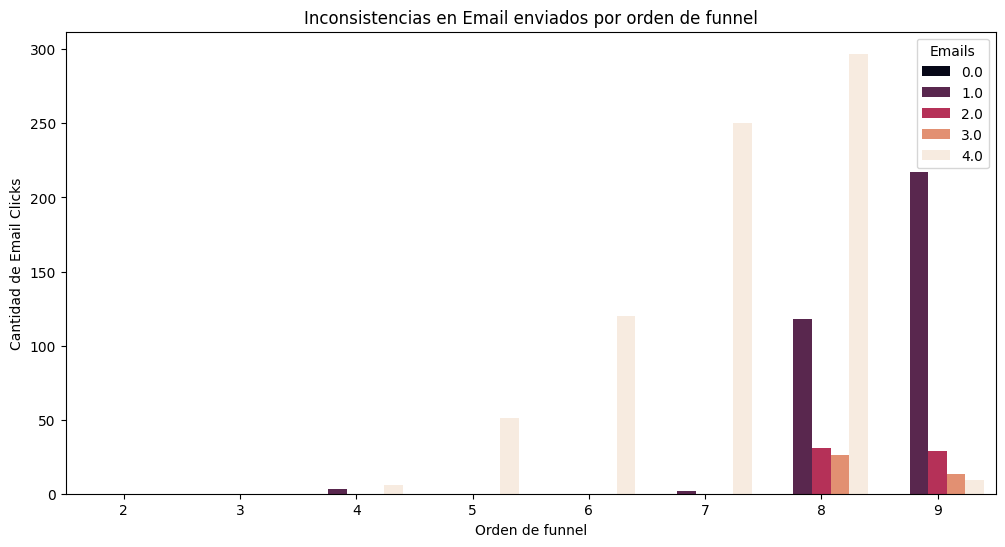

In [348]:
plt.figure(figsize=(12, 6))
sns.barplot(x='funnel_order', y='contar_clicks', hue='Emails', data=Emails_enviados, palette='rocket')
plt.title('Inconsistencias en Email enviados por orden de funnel')
plt.xlabel('Orden de funnel')
plt.ylabel('Cantidad de Email Clicks')
plt.show()

### Emails Clicks y Sms Clicks == 0.  Con orden de funnel > 4

In [349]:
df["Order Funnel State"].unique()

array(['2-Notification sent', '3-Notification opened',
       '8-Submitted login', '5-Widget loaded', '4-Notification click',
       '9-Completed', '6-Employer selected', '7-Viewed provider login'],
      dtype=object)

In [350]:
funnel_inconsistente_4 = df[((df['funnel_order'] >= 4) & (df['Email Clicks'] == 0) & (df['Sms Clicks'] == 0))]
funnel_inconsistente_4

,Client Domain,User Phone Timezone,Created At,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,Sms Opens,Platforms Order Group - Order → Manager,Platforms Order Group - Order → Source,order_has_user_email,order_has_user_phone,funnel_order
164,A,Unknown,2022-09-02T21:31:54.085502Z,0,4,4.0,1,7-Viewed provider login,0.0,0,0,masked@order_manager.org,internal,True,False,7
179,A,Unknown,2022-09-08T17:48:28.880669Z,0,2,4.0,1,6-Employer selected,0.0,0,0,masked@order_manager.org,internal,True,False,6
1483,A,EST,2022-07-05T14:49:39.580578Z,0,3,4.0,1,7-Viewed provider login,1.0,0,0,masked@order_manager.org,internal,True,True,7
1613,A,CST,2022-08-12T20:12:05.020255Z,0,3,4.0,1,6-Employer selected,1.0,0,0,masked@order_manager.org,internal,True,True,6


### Estas inconsistencias pueden afectar la tasa de conversión, la satisfacción del cliente y la integridad general de la analítica. Aquí hay un tratamiento propuesto para cada tipo de inconsistencia:

1. SMS o Correo Electrónico Abierto pero No Enviado
   Tratamiento: Marcar estos registros para revisión manual. Es crucial entender por qué el sistema muestra un SMS o correo electrónico como abierto pero no enviado. Si es un error del sistema, necesita atención inmediata.

2. SMS o Correo Electrónico Clickeado pero No Abierto
   Tratamiento: Similar al anterior, marcar estos para revisión manual. Esto podría ser un problema de seguimiento donde el evento 'abierto' no se está capturando correctamente.

3. Estado Avanzado del Embudo sin Estados Precedentes
   Tratamiento: Estos registros deben marcarse y revisarse para entender por qué omitieron los estados iniciales del embudo. Podría ser un problema del sistema o un comportamiento del usuario que necesita comprenderse.

In [351]:
funnel_consistente = df[~((df['funnel_order'] > 2) & (df['Email Opens'] == 0) & (df['Sms Opens'] == 0))]

# Filtro de registros donde el SMS o el Email se hace clic pero no se abre
funnel_consistente = funnel_consistente[~((funnel_consistente['Sms Clicks'] > 0) & (funnel_consistente['Sms Opens'] == 0))]
funnel_consistente = funnel_consistente[~((funnel_consistente['Email Clicks'] > 0) & (funnel_consistente['Email Opens'] == 0))]


In [352]:
print(f"La longitud del dataframe original es {len(df)} y el nuevo dataframe tiene longitud {len(funnel_consistente)}. Una diferencia que es {len(df)-len(funnel_consistente)} y representa {((len(df)-len(funnel_consistente))/len(df))*100:.2f}% del dataframe original")

La longitud del dataframe original es 4074 y el nuevo dataframe tiene longitud 1611. Una diferencia que es 2463 y representa 60.46% del dataframe original


Dado el contexto de Gregors, un producto B2B2C que se ocupa de la verificación de ingresos y empleo, las inconsistencias en los datos pueden tener implicaciones significativas. Estas inconsistencias pueden afectar la tasa de conversión, la satisfacción del cliente y la integridad general de la analítica.

Por lo tanto, vamos a analizar la tasa de conversión con ambos conjuntos de datos y verificar si observamos el mismo patrón.

In [353]:
#df = funnel_consistente

# Análisis de la Tasa de Conversión

Vamos a comparar la tasa de conversión a lo largo del tiempo en que se creó el pedido. Para ello, primero debemos manejar la columna de fecha y hora (datetime).

In [354]:
# Convertimos la columna 'Created At' a formato datetime
df['Created At'] = pd.to_datetime(df['Created At'])
# Extraemos el día, mes y año
df['Day'] = df['Created At'].dt.day
df['Month'] = df['Created At'].dt.month
df['Year'] = df['Created At'].dt.year

In [355]:
# Funcion para calcular y graficar la tasa de conversion
def plot_conversion_rate(df, title):
    completed_df = df[df['Order Funnel State'] == '9-Completed']
    completed_grouped = completed_df.groupby(['Year', 'Month']).size().reset_index(name='Completed_Count')
    total_grouped = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Count')
    conversion_df = pd.merge(total_grouped, completed_grouped, on=['Year', 'Month'], how='left').fillna(0)
    conversion_df['Conversion_Rate'] = (conversion_df['Completed_Count'] / conversion_df['Total_Count']) * 100
    conversion_df['Year_Month'] = conversion_df['Year'].astype(str) + '-' + conversion_df['Month'].astype(str).str.zfill(2)
    
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='Year_Month', y='Conversion_Rate', data=conversion_df, marker='o')
    plt.title(title)
    plt.xlabel('Año-Mes')
    plt.ylabel('Tasa de Conversión (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


## Análisis del df Original

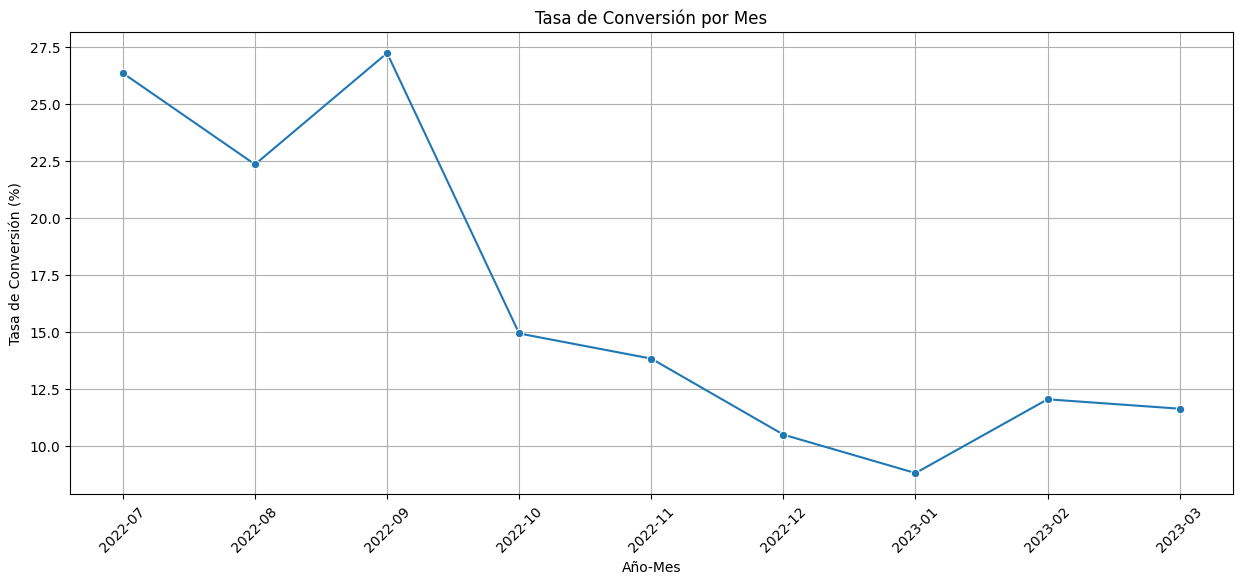

In [356]:
plot_conversion_rate(df, 'Tasa de Conversión por Mes')

## Tasa de conversión de Email vs Clicks

In [357]:
# Filtro la data para interacciones de Email
email_df = df[(df['Sms Clicks'] == 0) & (df['Email Clicks'] > 0)]

# Filtro la data para interacciones de SMS
sms_df = df[(df['Email Clicks'] == 0) & (df['Sms Clicks'] > 0)]

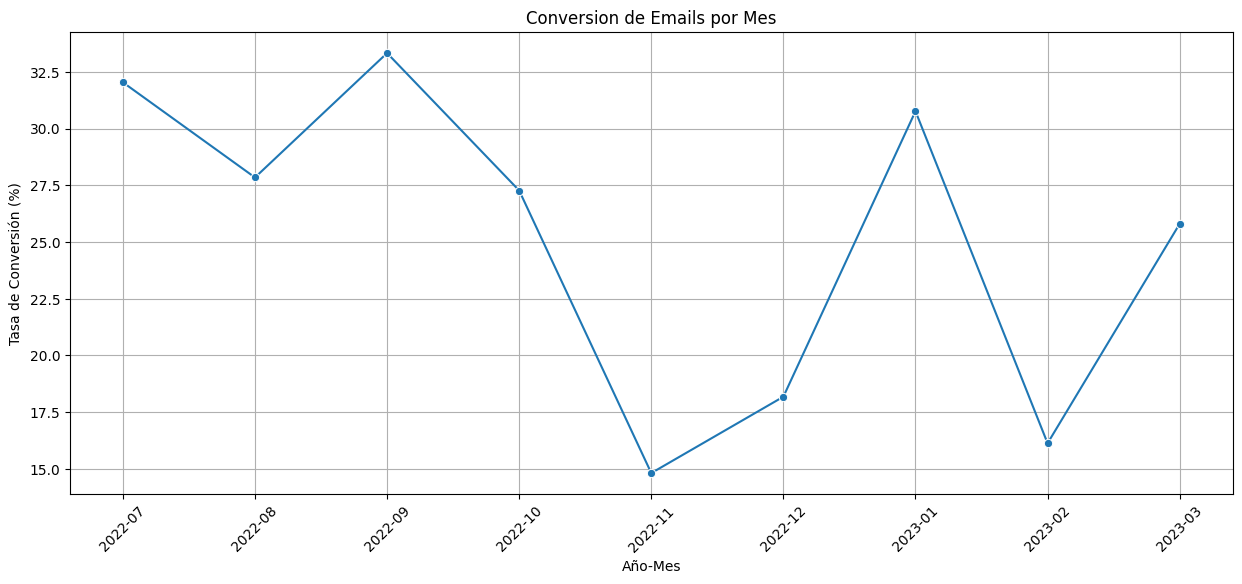

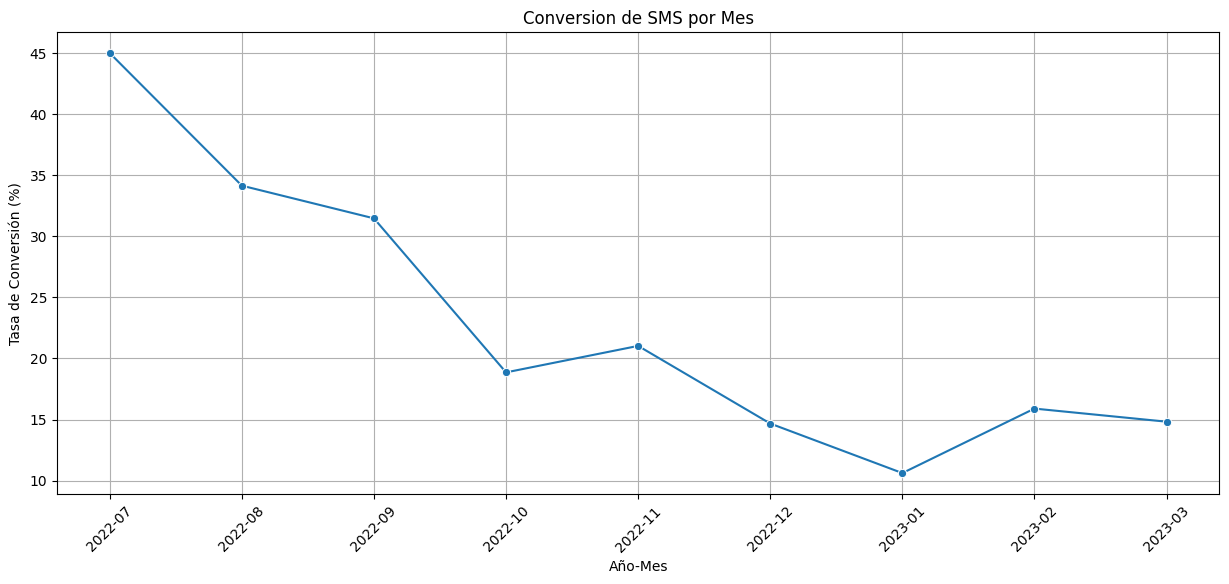

In [358]:
# Grafico la tasa de conversion para interacciones de Email
plot_conversion_rate(email_df, 'Conversion de Emails por Mes')

# Grafico la tasa de conversion para interacciones de SMS
plot_conversion_rate(sms_df, 'Conversion de SMS por Mes')

Cuando analizamos la tasa de conversión

## Lo que se supone que es el df consistente

In [359]:
# Convierto 'Created At' a formato datetime
funnel_consistente['Created At'] = pd.to_datetime(funnel_consistente['Created At'])
# Extraigo el día, mes y año
funnel_consistente['Day'] = funnel_consistente['Created At'].dt.day
funnel_consistente['Month'] = funnel_consistente['Created At'].dt.month
funnel_consistente['Year'] = funnel_consistente['Created At'].dt.year
# Extraigo la hora y el minuto
funnel_consistente['Hour'] = funnel_consistente['Created At'].dt.hour
funnel_consistente['Minute'] = funnel_consistente['Created At'].dt.minute

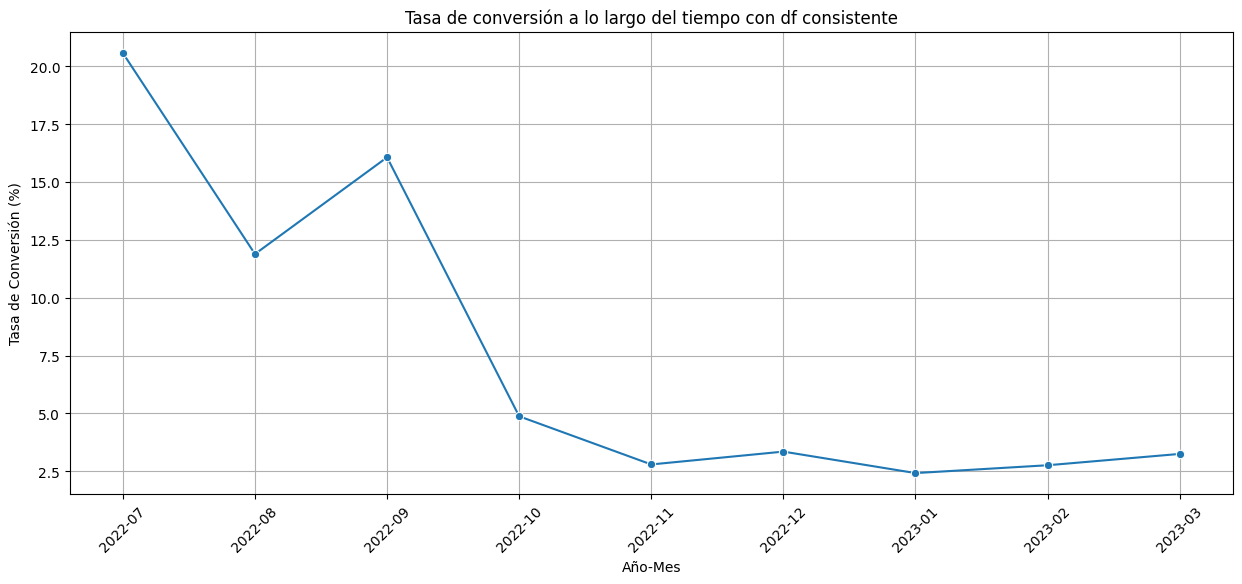

In [360]:

plot_conversion_rate(funnel_consistente, 'Tasa de conversión a lo largo del tiempo con df consistente')

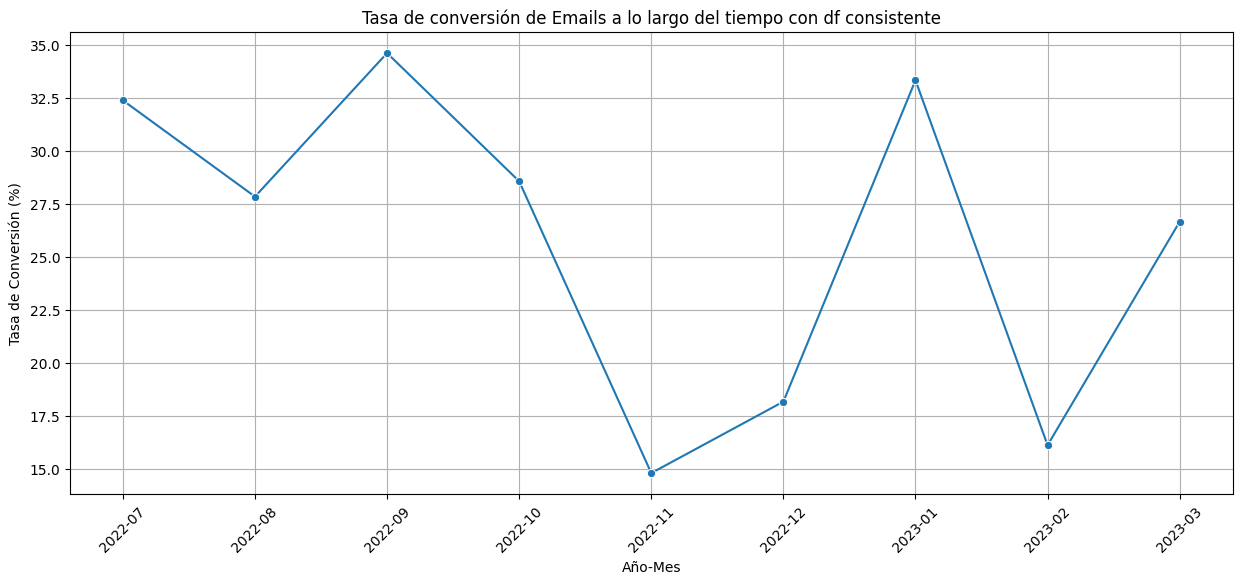

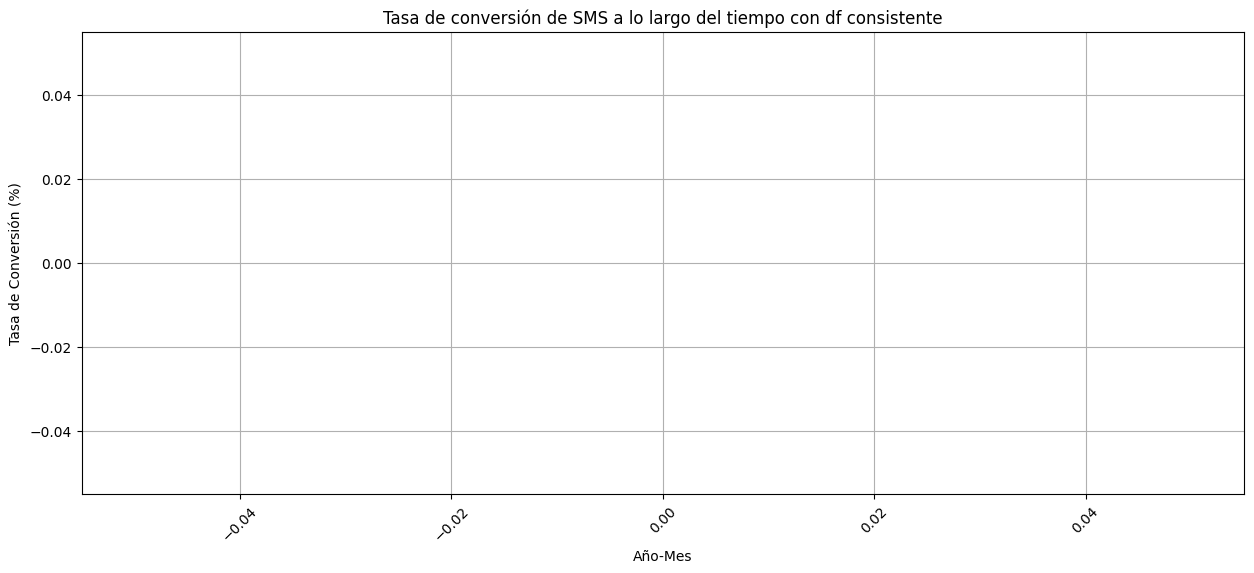

In [361]:
# Filtro la data para interacciones de Email
email_df = funnel_consistente[(df['Sms Clicks'] == 0) & (funnel_consistente['Email Clicks'] > 0)]

# Filtro la data para interacciones de SMS
sms_df = funnel_consistente[(funnel_consistente['Email Clicks'] == 0) & (funnel_consistente['Sms Clicks'] > 0)]

# Grafico la tasa de conversion para interacciones de Email
plot_conversion_rate(email_df, 'Tasa de conversión de Emails a lo largo del tiempo con df consistente')

# Grafico la tasa de conversion para interacciones de SMS
plot_conversion_rate(sms_df, 'Tasa de conversión de SMS a lo largo del tiempo con df consistente')


Hemos observado que no hay un cambio significativo en la tendencia de la tasa de conversión al comparar el conjunto de datos original anterior a 2023.

Sin embargo, ha ocurrido un cambio notable en los últimos meses y también hemos separado los SMS de los correos electrónicos.

## Suposiciones
Asumiré que las inconsistencias observadas son el resultado de la ventana de tiempo específica capturada en este conjunto de datos. Es probable que los clientes que no tienen un registro de correos electrónicos o SMS enviados en realidad hayan sido contactados, pero esa información no está disponible en esta muestra. A pesar de esto, no debería obstaculizar nuestra capacidad para continuar con pruebas de hipótesis y análisis adicionales.

# "User Phone Timezone"

Una buena hipótesis a investigar podría ser que la zona horaria en la que se contacta a los clientes tiene un impacto significativo en la tasa de conversión. La lógica detrás de esta hipótesis es que el momento de las notificaciones (ya sea por correo electrónico o SMS) podría afectar la probabilidad de que el cliente interactúe con ellas. Por ejemplo, es menos probable que un mensaje enviado en medio de la noche según la zona horaria del cliente se abra y, por lo tanto, conduzca a una conversión exitosa.

### Justificación para eliminar "Unknown Timezone"
Podemos justificar la eliminación de registros con "Unknown Timezone" para este análisis específico porque esos datos no nos proporcionan información sobre la zona horaria del cliente. Sin esta información, no podemos evaluar efectivamente el impacto de la zona horaria en la tasa de conversión. Además, la falta de datos de zona horaria podría introducir ruido en el análisis, dificultando la identificación de patrones significativos.

Si queremos poner a prueba las conclusiones con el embudo consistente, podemos descomentar la siguiente línea.

In [362]:
#df = funnel_consistente 

In [363]:
df["User Phone Timezone"].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

User Phone Timezone
CST        0.578547
EST        0.313451
Unknown    0.059401
PST        0.031419
MST        0.013255
AST        0.001964
UTC-10     0.001227
UTC-9      0.000736
Name: proportion, dtype: float64

In [364]:
df_tz = df[df["User Phone Timezone"]!= "Unknown"]

In [365]:
timezone_format = {'EST':'America/New_York', 
            'CST':'America/Chicago', 
            'PST':'America/Los_Angeles',
            'MST':'America/Denver',
            'AST':'America/Puerto_Rico',
                   'UTC-10':'Pacific/Honolulu',
                     'UTC-9':'America/Anchorage'
                   }

df_tz['hrs-pyz'] = df_tz["User Phone Timezone"].map(timezone_format)

In [366]:
df_tz['hrs-pyz'].value_counts(normalize=True, dropna=False).sort_values(ascending=False)

hrs-pyz
America/Chicago        0.615084
America/New_York       0.333246
America/Los_Angeles    0.033403
America/Denver         0.014092
America/Puerto_Rico    0.002088
Pacific/Honolulu       0.001305
America/Anchorage      0.000783
Name: proportion, dtype: float64

## Convertir a la zona horaria del cliente

In [367]:
import pytz
import pandas as pd

def convert_a_hora_local(row):
    try:
        if pd.isnull(row['Created At']) or row['User Phone Timezone'] is None:
            return row['Created At']
        
        zonahoraria_local = pytz.timezone(row['hrs-pyz'])
        
        if row['Created At'].tzinfo is not None:
            horario_local = row['Created At'].astimezone(zonahoraria_local)
        else:  
            tiempo_utc = pytz.utc.localize(row['Created At'])
            horario_local = tiempo_utc.astimezone(zonahoraria_local)
        
        return horario_local
    except Exception as e:
        print(f"Row with error {row['Created At']} -> to {row['hrs-pyz']}")
        return row['Created At']
    
df_tz['local_time'] = df_tz.apply(convert_a_hora_local, axis=1)
df_tz

,Client Domain,User Phone Timezone,Created At,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,...,Platforms Order Group - Order → Manager,Platforms Order Group - Order → Source,order_has_user_email,order_has_user_phone,funnel_order,Day,Month,Year,hrs-pyz,local_time
194,A,EST,2023-01-20 19:03:11.624372+00:00,2,0,4.0,1,6-Employer selected,1.0,1,...,masked@order_manager.org,internal,True,True,6,20,1,2023,America/New_York,2023-01-20 14:03:11.624372-05:00
195,A,EST,2022-07-12 17:44:08.149542+00:00,1,1,1.0,0,9-Completed,1.0,1,...,masked@order_manager.org,internal,True,True,9,12,7,2022,America/New_York,2022-07-12 13:44:08.149542-04:00
196,A,EST,2022-08-08 20:24:56.757669+00:00,1,1,1.0,0,9-Completed,1.0,0,...,masked@order_manager.org,internal,True,True,9,8,8,2022,America/New_York,2022-08-08 16:24:56.757669-04:00
197,A,EST,2022-11-28 17:32:59.758117+00:00,0,4,4.0,1,7-Viewed provider login,1.0,1,...,masked@order_manager.org,internal,True,True,7,28,11,2022,America/New_York,2022-11-28 12:32:59.758117-05:00
198,A,EST,2022-07-07 15:39:00.538025+00:00,4,4,4.0,1,5-Widget loaded,1.0,1,...,masked@order_manager.org,internal,True,True,5,7,7,2022,America/New_York,2022-07-07 11:39:00.538025-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,A,CST,2022-07-18 18:21:37.529621+00:00,1,1,4.0,1,7-Viewed provider login,1.0,0,...,masked@order_manager.org,internal,True,True,7,18,7,2022,America/Chicago,2022-07-18 13:21:37.529621-05:00
4033,A,CST,2022-07-14 18:19:03.889063+00:00,0,0,4.0,1,8-Submitted login,1.0,1,...,masked@order_manager.org,internal,True,True,8,14,7,2022,America/Chicago,2022-07-14 13:19:03.889063-05:00
4034,A,CST,2022-08-18 20:30:09.688551+00:00,0,0,0.0,1,7-Viewed provider login,1.0,1,...,masked@order_manager.org,internal,False,True,7,18,8,2022,America/Chicago,2022-08-18 15:30:09.688551-05:00
4035,A,EST,2022-10-27 18:09:06.743787+00:00,0,0,0.0,1,7-Viewed provider login,1.0,1,...,masked@order_manager.org,internal,False,True,7,27,10,2022,America/New_York,2022-10-27 14:09:06.743787-04:00


### Horario de la llamada

In [368]:
def revisar_horario(horario):
    horario = str(horario)
    return horario.split(" ")[1].split(":")[0]

df_tz['local_time_apply'] = df_tz['local_time'].apply(revisar_horario)

In [369]:
df_tz['local_time_apply'] = df_tz['local_time_apply'].astype(int)

<Axes: xlabel='local_time_apply', ylabel='Count'>

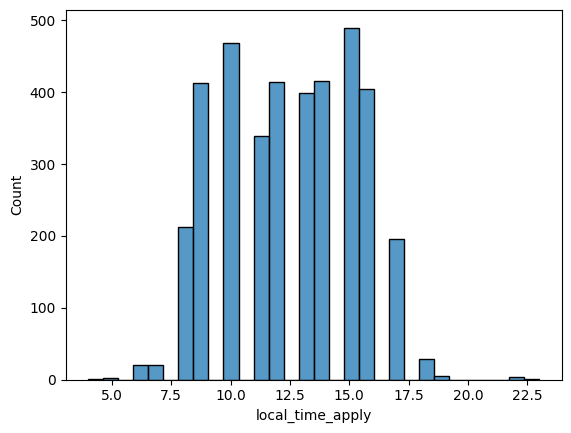

In [370]:
import seaborn as sns

sns.histplot(data=df_tz, x="local_time_apply")


In [371]:
df_tz["conversion"] = df_tz['Order Funnel State'] == "9-Completed"

df_tz["conversion"] = df_tz["conversion"].astype(int)

conv_df = df_tz.groupby('local_time_apply', as_index=True).agg(cant_conversion = ("conversion","sum"),
                                       totales = ("conversion","count") )

conv_df["%_conversion"] = conv_df["cant_conversion"]/conv_df["totales"]
conv_df

,cant_conversion,totales,%_conversion
local_time_apply,,,
4,1,1,1.000000
5,0,2,0.000000
6,5,20,0.250000
7,2,20,0.100000
8,37,213,0.173709
9,72,413,0.174334
10,74,468,0.158120
11,48,339,0.141593
12,73,414,0.176329


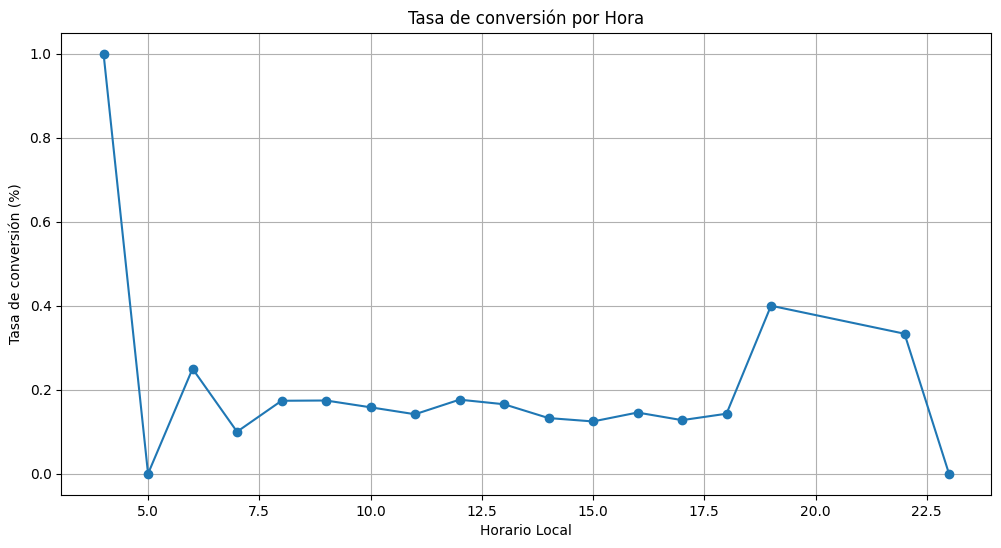

In [372]:
conv_df = conv_df.sort_index()
plt.figure(figsize=(12, 6))

plt.plot(conv_df.index, conv_df['%_conversion'], marker='o')

plt.title('Tasa de conversión por Hora')
plt.xlabel('Horario Local')
plt.ylabel('Tasa de conversión (%)')
plt.grid(True)

plt.show()

In [373]:
conv_df_by_tz = df_tz.groupby(['hrs-pyz','local_time_apply'], as_index=True).agg(cant_conversion = ("conversion","sum"),
                                       totales = ("conversion","count") )

conv_df_by_tz["%_conversion"] = conv_df_by_tz["cant_conversion"]/conv_df_by_tz["totales"]
conv_df_by_tz

cant_conversion  totales  %_conversion
hrs-pyz             local_time_apply                                        
America/Anchorage   5                               0        1      0.000000
                    7                               0        1      0.000000
                    13                              0        1      0.000000
America/Chicago     7                               0        2      0.000000
                    8                              35      191      0.183246
                    9                              40      281      0.142349
                    10                             32      299      0.107023
                    11                             30      178      0.168539
                    12                             47      251      0.187251
                    13                             35      231      0.151515
                    14                             34      248      0.137097
                    15                             40      338      0.118343
                    16                             37      282      0.131206
                    17                              9       47      0.191489
                    18                              0        7      0.000000
                    22                              1        2      0.500000
America/Denver      7                               0        4      0.000000
                    8                               1        6      0.166667
                    9                               2        8      0.250000
                    10                              2        4      0.500000
                    11                              3        5      0.600000
                    12                              1        8      0.125000
                    13                              0        6      0.000000
                    14                              0        9      0.000000
                    15                              0        4      0.000000
America/Los_Angeles 5                               0        1      0.000000
                    6                               5       19      0.263158
                    7                               2       13      0.153846
                    8                               1       16      0.062500
                    9                               1       14      0.071429
                    10                              2       13      0.153846
                    11                              1       10      0.100000
                    12                              1       11      0.090909
                    13                              1       12      0.083333
                    14                              1       19      0.052632
America/New_York    9                              29      110      0.263636
                    10                             37      150      0.246667
                    11                             14      141      0.099291
                    12                             24      143      0.167832
                    13                             30      149      0.201342
                    14                             20      139      0.143885
                    15                             21      148      0.141892
                    16                             22      122      0.180328
                    17                             16      147      0.108844
                    18                              4       21      0.190476
                    19                              2        5      0.400000
                    22                              0        1      0.000000
                    23                              0        1      0.000000
America/Puerto_Rico 10                              1        2      0.500000
                    11                              0        2      0.000000
                    12            

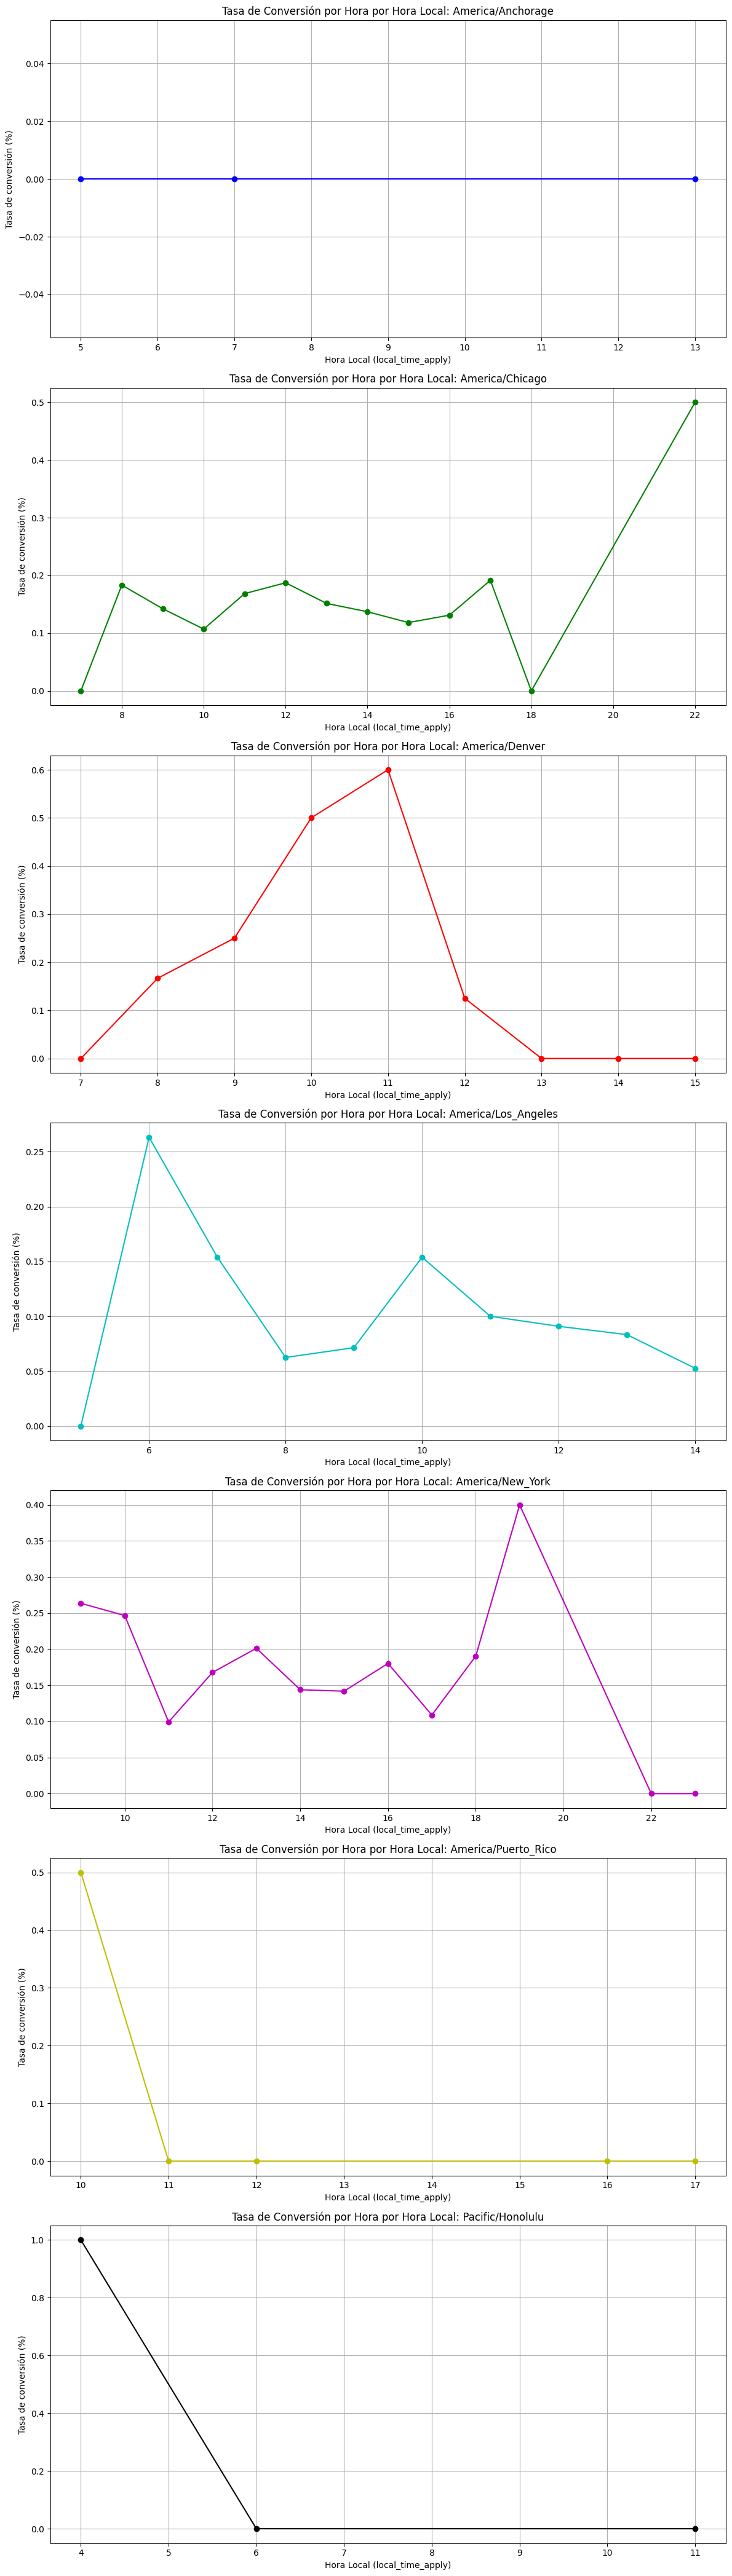

In [374]:
import matplotlib.pyplot as plt

# Ordeno por zona horaria y hora
conv_df_by_tz = conv_df_by_tz.sort_index()

# Obtengo las zonas horarias únicas
unique_timezones = conv_df_by_tz.index.get_level_values('hrs-pyz').unique()

# Calculo el número de zonas horarias
n_timezones = len(unique_timezones)

# Lista de colores
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Crear subgraficos
fig, axes = plt.subplots(n_timezones, 1, figsize=(12, 6 * n_timezones))

for i, tz in enumerate(unique_timezones):
    ax = axes[i]
    subset = conv_df_by_tz.loc[tz]
    
    # Selecionar color
    color = colors[i % len(colors)]
    
    ax.plot(subset.index.get_level_values('local_time_apply'), subset['%_conversion'], marker='o', color=color)
    ax.set_title(f'Tasa de Conversión por Hora por Hora Local: {tz}')
    ax.set_xlabel('Hora Local (local_time_apply)')
    ax.set_ylabel('Tasa de conversión (%)')
    ax.grid(True)

plt.tight_layout()
plt.show()




Analizando cada tasa de conversión, se pueden hacer las siguientes observaciones:

- En la zona horaria 'America/Anchorage', hay una tasa de conversión del 0%.
- En la zona horaria 'America/Chicago', se observa un buen rendimiento desde las 8 AM hasta las 5 PM, con otro pico que ocurre después de las 8 PM.
- En la zona horaria 'America/Denver', la tasa de conversión sigue una distribución normal, con el pico de la curva ocurriendo a las 11 AM.
- En la zona horaria 'America/Los Angeles', el pico ocurre a las 6 AM.
- En la zona horaria 'America/New York', el pico ocurre a las 7 PM.
- Tanto en Puerto Rico como en Honolulu, la tasa de conversión también es del 0%.

Recomendación:
Dadas estas observaciones, sería más efectivo comunicarse con los clientes en los momentos en que las tasas de conversión son más altas en sus respectivas zonas horarias. Específicamente:

- Para los clientes en la zona horaria 'America/Chicago', centrar los esfuerzos de comunicación entre las 8 AM y las 5 PM, y considerar un impulso secundario después de las 8 PM.
- Para aquellos en la zona horaria 'America/Denver', intentar comunicarse alrededor de las 11 AM.
- En la zona horaria 'America/Los Angeles', parece ser más efectivo temprano en la mañana a las 6 AM.
- Para la zona horaria 'America/New York', considerar dirigir las comunicaciones alrededor de las 7 PM.
- No tiene sentido asignar recursos para llegar a los clientes en las zonas horarias 'America/Anchorage', Puerto Rico y Honolulu en este momento, dada la tasa de conversión del 0% observada.

Para un análisis más detallado, necesitamos realizar gráficos que respalden estas observaciones.

### Hipotesis Expired


In [375]:
df_tz.groupby("conversion").agg(cantidad_expired =("Expired","sum"),
                            media_expired =("Expired","mean")) 

,cantidad_expired,media_expired
conversion,,
0,2875,0.885433
1,37,0.063248


In [376]:
df_exp = df_tz.groupby("Expired").agg(cant_conv =("conversion","sum"),
                                                     total_de_muestra= ("conversion","count"),
                         tasa_conv =("conversion","mean")) 

df_exp

,cant_conv,total_de_muestra,tasa_conv
Expired,,,
0,557,1077,0.517177
1,21,2630,0.007985
2,5,101,0.049505
3,2,16,0.125000
4,0,8,0.000000


## Tasa de conversión por mes de order_has_user_email y order_has_user_phone

In [377]:
email_a_lo_largo_del_tiempo_por_mes = df_tz.groupby(["Month","order_has_user_email"]).agg(cant_conv =("conversion","sum"),
                            total_de_muestra= ("conversion","count"),
                            tasa_conv =("conversion","mean"))
email_a_lo_largo_del_tiempo_por_mes = email_a_lo_largo_del_tiempo_por_mes.reset_index()

In [378]:
phone_a_lo_largo_del_tiempo_por_mes = df_tz.groupby(["Month","order_has_user_phone"]).agg(cant_conv =("conversion","sum"),
                            total_de_muestra= ("conversion","count"),
                            tasa_conv =("conversion","mean"))
phone_a_lo_largo_del_tiempo_por_mes = phone_a_lo_largo_del_tiempo_por_mes.reset_index()

#### Lineplot de la conversión por mes de order_has_user_email y order_has_user_phone

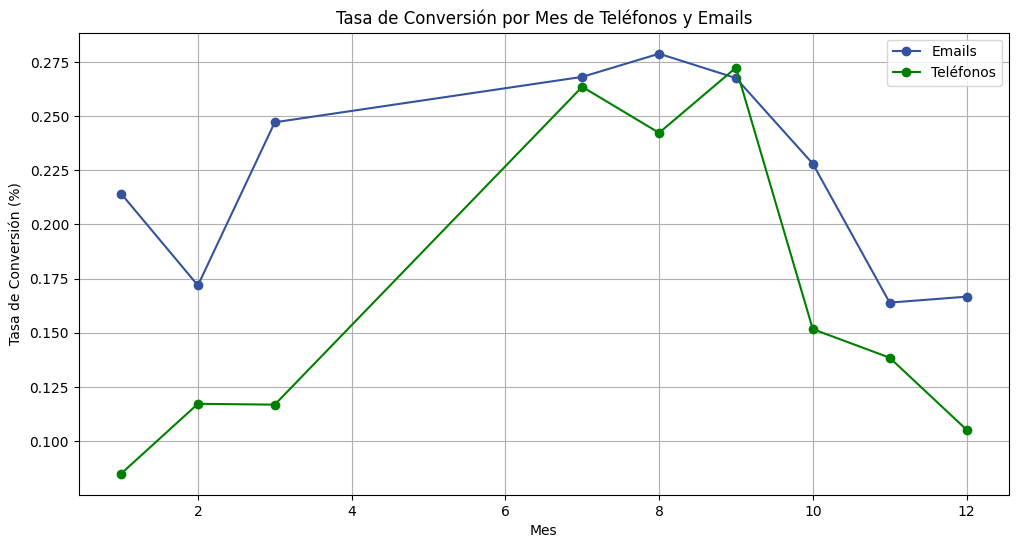

In [379]:
plt.figure(figsize=(12, 6))
plt.plot(email_a_lo_largo_del_tiempo_por_mes[email_a_lo_largo_del_tiempo_por_mes["order_has_user_email"]==1]["Month"], email_a_lo_largo_del_tiempo_por_mes[email_a_lo_largo_del_tiempo_por_mes["order_has_user_email"]==1]["tasa_conv"], marker='o', color = "#34529e")
plt.plot(phone_a_lo_largo_del_tiempo_por_mes[phone_a_lo_largo_del_tiempo_por_mes["order_has_user_phone"]==1]["Month"], phone_a_lo_largo_del_tiempo_por_mes[phone_a_lo_largo_del_tiempo_por_mes["order_has_user_phone"]==1]["tasa_conv"], marker='o', color = "green")
plt.title('Tasa de Conversión por Mes de Teléfonos y Emails')
plt.xlabel('Mes')
plt.ylabel('Tasa de Conversión (%)')
plt.grid(True)
plt.legend(["Emails","Teléfonos"])
plt.show()

In [380]:
email_data = email_a_lo_largo_del_tiempo_por_mes[email_a_lo_largo_del_tiempo_por_mes['order_has_user_email'] == 1]
phone_data = phone_a_lo_largo_del_tiempo_por_mes[phone_a_lo_largo_del_tiempo_por_mes['order_has_user_phone'] == 1]

In [381]:
pivot_table_email = pd.pivot_table(email_data, values='tasa_conv', index='Month')
pivot_table_phone = pd.pivot_table(phone_data, values='tasa_conv', index='Month')

In [382]:
pivot_table_combinada = pd.concat([pivot_table_email, pivot_table_phone], axis=1)
pivot_table_combinada.rename(columns={'tasa_conv': 'Con Email', 'tasa_conv': 'Con Teléfono'}, inplace=True)
pivot_table_combinada

,Con Teléfono,Con Teléfono
Month,,
1,0.214286,0.084926
2,0.171875,0.117202
3,0.247191,0.116829
7,0.268156,0.263566
8,0.278846,0.242321
9,0.267606,0.272401
10,0.228070,0.151685
11,0.163934,0.138504
12,0.166667,0.105263


#### Heatmap de la conversión por mes de order_has_user_email y order_has_user_phone

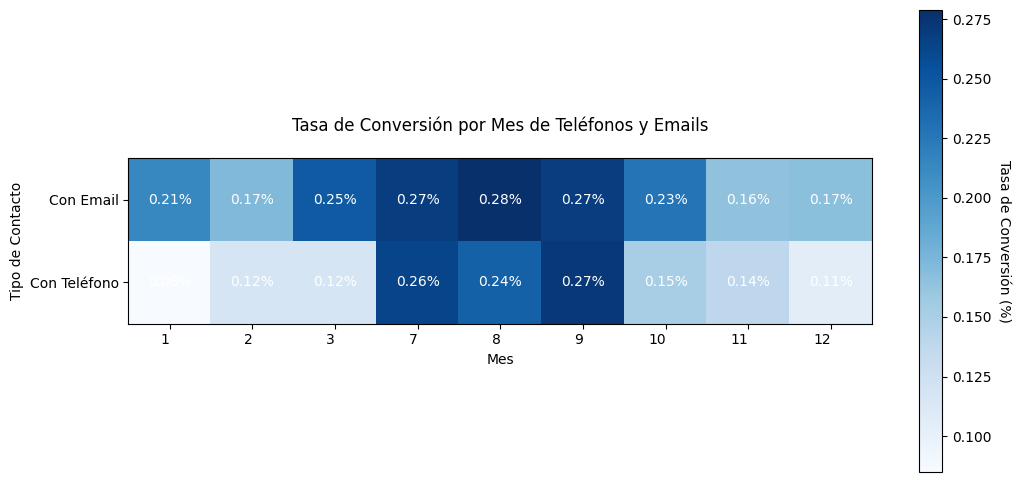

In [383]:
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(pivot_table_combinada.T, cmap='Blues')
ax.set_xticks(range(len(pivot_table_combinada.index)))
ax.set_yticks(range(len(pivot_table_combinada.columns)))
ax.set_xticklabels(pivot_table_combinada.index, ha="right")
ax.set_yticklabels(["Con Email", "Con Teléfono"])
ax.set_xlabel('Mes')
ax.set_ylabel('Tipo de Contacto')
ax.set_title('Tasa de Conversión por Mes de Teléfonos y Emails', pad=20)

for i in range(len(pivot_table_combinada.columns)):
    for j in range(len(pivot_table_combinada.index)):
        text = ax.text(j, i, '{:.2f}%'.format(pivot_table_combinada.iloc[j, i]), ha='center', va='center', color='white')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Tasa de Conversión (%)', rotation=270, va='bottom')
plt.show()


### En cuánto bajó la conversión de Septiembre a Octubre?

In [384]:
tasa_conversion_de_septiembre = (pivot_table_combinada.iloc[5, :]).sum()
tasa_conversion_de_octubre = (pivot_table_combinada.iloc[6, :]).sum()

In [385]:
caida_de_conversion = ((tasa_conversion_de_septiembre - tasa_conversion_de_octubre) * 100).round(2)
print("La caída de la tasa de conversión de Septiembre a Octubre fue de un" + " " + str(caida_de_conversion) + "%")

La caída de la tasa de conversión de Septiembre a Octubre fue de un 16.03%


## Asumimos que New York City es la sede de Gregors, por lo que filtramos los datos para incluir solo pedidos de esa ciudad para analizar la tasa de conversión por mes.

In [386]:
new_york_conversion = df_tz[["order_has_user_email", "order_has_user_phone", "hrs-pyz", "local_time_apply", "conversion"]]
new_york_conversion = new_york_conversion[new_york_conversion["hrs-pyz"] == "America/New_York"]
new_york_conversion = new_york_conversion.groupby(["local_time_apply", "order_has_user_email", "order_has_user_phone"]).agg(cant_conversion =("conversion","sum"),
                            totales= ("conversion","count"),
                            tasa_conversion =("conversion","mean"))
new_york_conversion.reset_index(inplace=True)
new_york_conversion

,local_time_apply,order_has_user_email,order_has_user_phone,cant_conversion,totales,tasa_conversion
0,9,False,True,12,49,0.244898
1,9,True,True,17,61,0.278689
2,10,False,True,12,54,0.222222
3,10,True,True,25,96,0.260417
4,11,False,True,5,85,0.058824
5,11,True,True,9,56,0.160714
6,12,False,True,6,57,0.105263
7,12,True,True,18,86,0.209302
8,13,False,True,8,79,0.101266
9,13,True,True,22,70,0.314286


#### Lineplot de la conversión por mes de order_has_user_email y order_has_user_phone en la zona horaria de America/Nueva_York

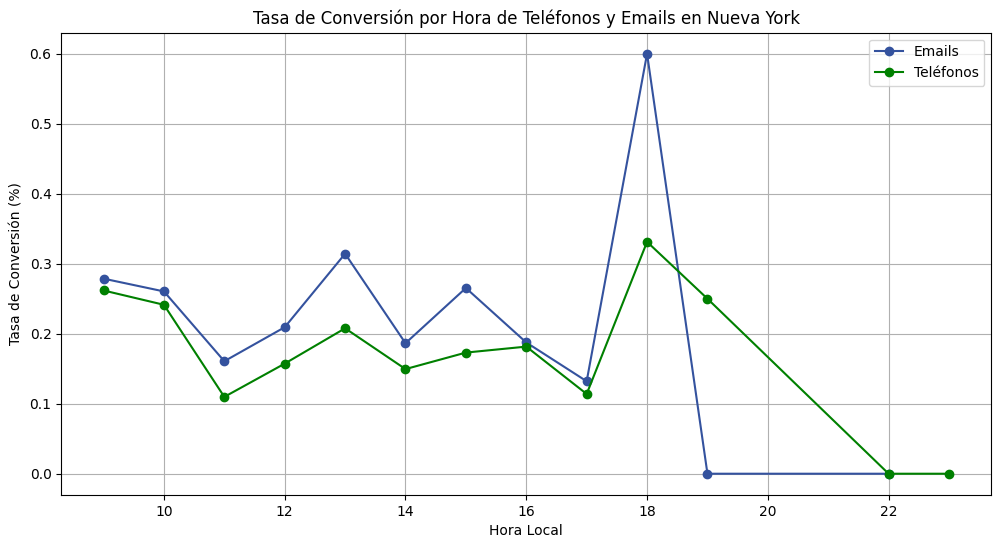

In [387]:
email_data = new_york_conversion[new_york_conversion["order_has_user_email"] == 1]
phone_data = new_york_conversion[new_york_conversion["order_has_user_phone"] == 1]

email_grouped = email_data.groupby("local_time_apply")["tasa_conversion"].mean()
phone_grouped = phone_data.groupby("local_time_apply")["tasa_conversion"].mean() # Hago un promedio porque hay varios valores para la misma hora.
    
plt.figure(figsize=(12, 6))
plt.plot(email_grouped.index, email_grouped, marker='o', color="#34529e")
plt.plot(phone_grouped.index, phone_grouped, marker='o', color="green")
plt.title('Tasa de Conversión por Hora de Teléfonos y Emails en Nueva York')
plt.xlabel('Hora Local')
plt.ylabel('Tasa de Conversión (%)')
plt.grid(True)
plt.legend(["Emails", "Teléfonos"])
plt.show()


#### Heatmap de la conversión por mes de order_has_user_email y order_has_user_phone en la zona horaria de America/Nueva_York

In [388]:
pivot_table_email2 = pd.pivot_table(email_data, values='tasa_conversion', index='order_has_user_email', columns='local_time_apply')
pivot_table_phone2 = pd.pivot_table(phone_data, values='tasa_conversion', index='order_has_user_phone', columns='local_time_apply')
pivot_table_combinada2 = pd.concat([pivot_table_email2, pivot_table_phone2])
pivot_table_combinada2

local_time_apply,9,10,11,12,13,14,15,16,17,18,19,22,23
True,0.278689,0.260417,0.160714,0.209302,0.314286,0.186441,0.265306,0.187500,0.132075,0.60000,0.00,0.0,NaN
True,0.261793,0.241319,0.109769,0.157283,0.207776,0.149470,0.173057,0.181588,0.113910,0.33125,0.25,0.0,0.0


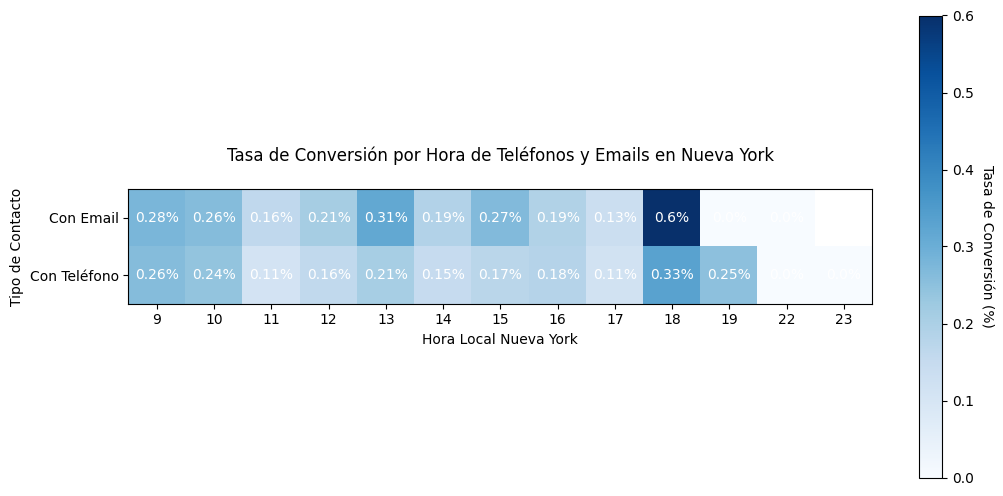

In [389]:
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(pivot_table_combinada2, cmap='Blues')
ax.set_yticks(range(len(pivot_table_combinada2.index)))
ax.set_xticks(range(len(pivot_table_combinada2.columns)))
ax.set_yticklabels(['Con Email', 'Con Teléfono'])
ax.set_xticklabels(pivot_table_combinada2.columns)
ax.set_ylabel('Tipo de Contacto')
ax.set_xlabel('Hora Local Nueva York')
ax.set_title('Tasa de Conversión por Hora de Teléfonos y Emails en Nueva York', pad=20)

for i in range(len(pivot_table_combinada2.index)):
    for j in range(len(pivot_table_combinada2.columns)):
        text = ax.text(j, i, '{:.2}%'.format(pivot_table_combinada2.iloc[i, j]), ha='center', va='center', color='w')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Tasa de Conversión (%)', rotation=-90, va='bottom')

plt.show()


## Tasa de conversión y proporción de correos electrónicos registrados

In [390]:
completed_df = df[df['Order Funnel State'] == '9-Completed']
completed_grouped = completed_df.groupby(['Year', 'Month']).size().reset_index(name='Completed_Count')
con_mail_df = df[df['order_has_user_email'] == True]
con_mail_grouped = con_mail_df.groupby(['Year', 'Month']).size().reset_index(name='Con_mail_Count')
total_grouped = df.groupby(['Year', 'Month']).size().reset_index(name='Total_Count')
conversion_con_mail_df = pd.merge(total_grouped, completed_grouped, on=['Year', 'Month'], how='left').fillna(0)
conversion_con_mail_df = pd.merge(conversion_con_mail_df, con_mail_grouped, on=['Year', 'Month'], how='left').fillna(0)
conversion_con_mail_df['Conversion_Rate'] = (conversion_con_mail_df['Completed_Count'] / conversion_con_mail_df['Total_Count']) * 100
conversion_con_mail_df['proporcion_con_mail'] = (conversion_con_mail_df['Con_mail_Count'] / conversion_con_mail_df['Total_Count']) *100
conversion_con_mail_df['Year_Month'] = df['Year'].astype(str) + '-' + conversion_con_mail_df['Month'].astype(str).str.zfill(2)
conversion_con_mail_df

,Year,Month,Total_Count,Completed_Count,Con_mail_Count,Conversion_Rate,proporcion_con_mail,Year_Month
0,2022,7,440,116,410,26.363636,93.181818,2023-07
1,2022,8,331,74,246,22.356495,74.320242,2022-08
2,2022,9,312,85,175,27.243590,56.089744,2023-09
3,2022,10,375,56,76,14.933333,20.266667,2023-10
4,2022,11,376,52,76,13.829787,20.212766,2023-11
5,2022,12,467,49,108,10.492505,23.126338,2022-12
6,2023,1,477,42,47,8.805031,9.853249,2022-01
7,2023,2,548,66,82,12.043796,14.963504,2022-02
8,2023,3,748,87,118,11.631016,15.775401,2023-03


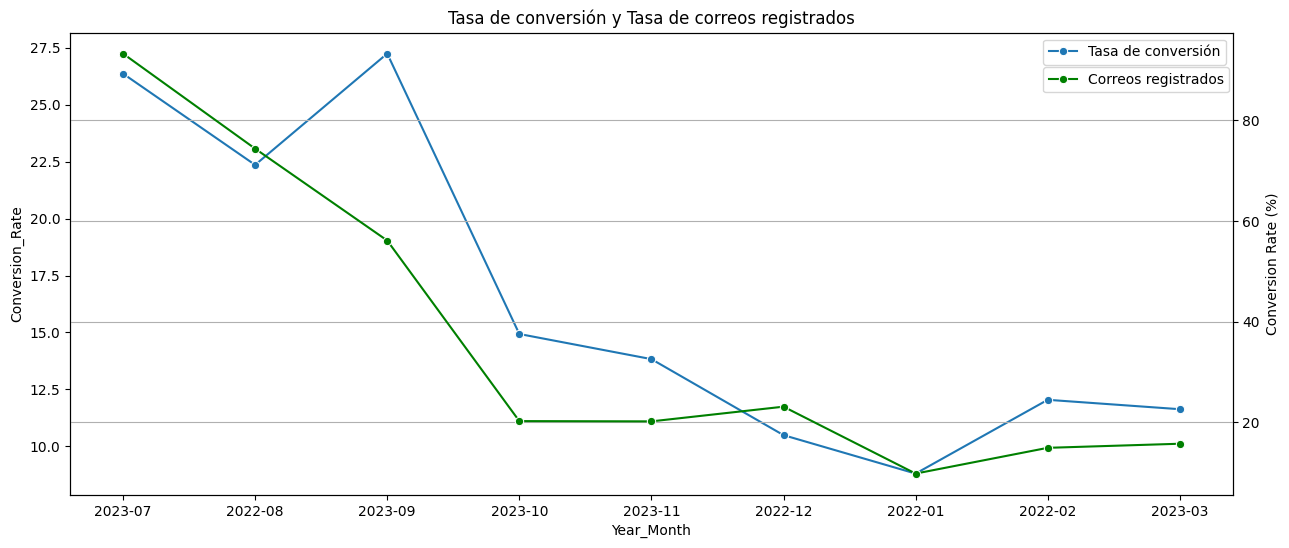

In [391]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year_Month', y='Conversion_Rate', data=conversion_con_mail_df, marker='o', label = "Tasa de conversión")
ax2 = plt.twinx()
sns.lineplot(x='Year_Month', y='proporcion_con_mail', data=conversion_con_mail_df, marker='o', color='green', ax=ax2, label = "Correos registrados")
sns.lineplot()
plt.title('Tasa de conversión y Tasa de correos registrados')
plt.xlabel('Año-Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc = "best", bbox_to_anchor=(1.003, 0.94))
plt.show()

## Tasa de conversión y proporción de teléfonos registrados

In [392]:
con_phone_df = df[df['order_has_user_phone'] == True]
con_phone_grouped = con_phone_df.groupby(['Year', 'Month']).size().reset_index(name='Con_phone_Count')
conversion_con_phone_df = pd.merge(total_grouped, completed_grouped, on=['Year', 'Month'], how='left').fillna(0)
conversion_con_phone_df = pd.merge(conversion_con_phone_df, con_phone_grouped, on=['Year', 'Month'], how='left').fillna(0)
conversion_con_phone_df['Conversion_Rate'] = (conversion_con_phone_df['Completed_Count'] / conversion_con_phone_df['Total_Count']) * 100
conversion_con_phone_df['proporcion_con_phone'] = (conversion_con_phone_df['Con_phone_Count'] / conversion_con_phone_df['Total_Count']) *100
conversion_con_phone_df['Year_Month'] = conversion_con_phone_df['Year'].astype(str) + '-' + conversion_con_phone_df['Month'].astype(str).str.zfill(2)
conversion_con_phone_df

,Year,Month,Total_Count,Completed_Count,Con_phone_Count,Conversion_Rate,proporcion_con_phone,Year_Month
0,2022,7,440,116,388,26.363636,88.181818,2022-07
1,2022,8,331,74,293,22.356495,88.519637,2022-08
2,2022,9,312,85,279,27.243590,89.423077,2022-09
3,2022,10,375,56,356,14.933333,94.933333,2022-10
4,2022,11,376,52,361,13.829787,96.010638,2022-11
5,2022,12,467,49,437,10.492505,93.576017,2022-12
6,2023,1,477,42,472,8.805031,98.951782,2023-01
7,2023,2,548,66,530,12.043796,96.715328,2023-02
8,2023,3,748,87,719,11.631016,96.122995,2023-03


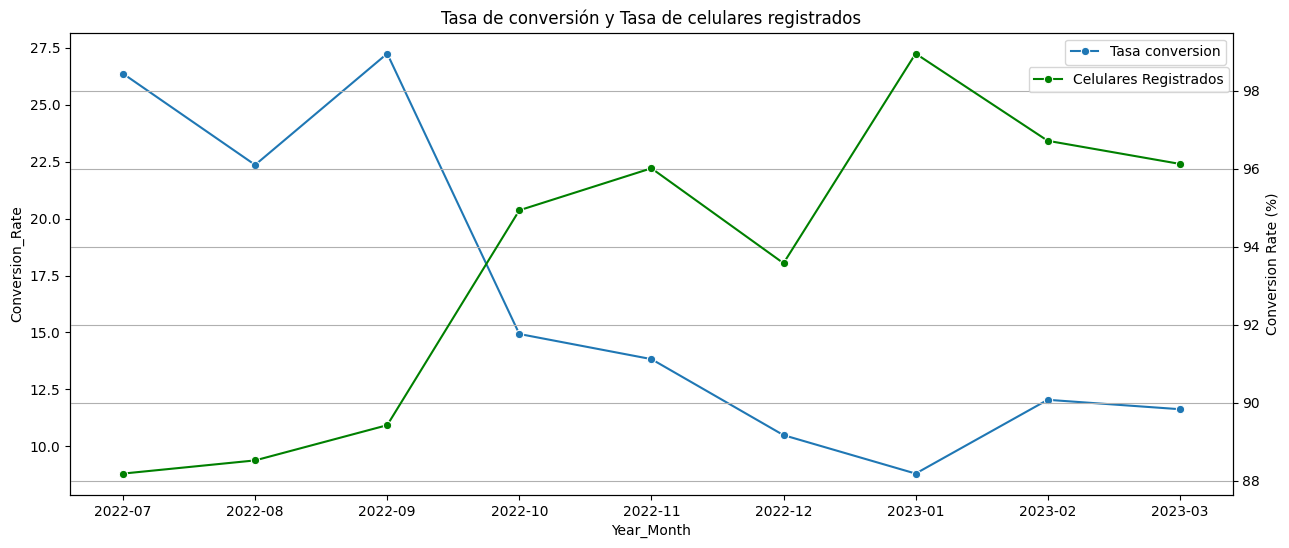

In [393]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Year_Month', y='Conversion_Rate', data=conversion_con_phone_df, marker='o', label='Tasa conversion')
ax2 = plt.twinx()
sns.lineplot(x='Year_Month', y='proporcion_con_phone', data=conversion_con_phone_df, marker='o', color='green', label='Celulares Registrados', ax=ax2)
plt.title('Tasa de conversión y Tasa de celulares registrados')
plt.xlabel('Year-Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc = "best", bbox_to_anchor=(1.003, 0.94))
plt.show()

# Model to see conclusions

In [394]:
cols = [
 'Email Clicks',
 'Email Opens',
 'Sms Clicks',
 'Sms Opens',
 'order_has_user_email',
 'order_has_user_phone',
 'hrs-pyz',
 'local_time_apply',
 'conversion']

df_model = df_tz[cols].copy()

In [395]:
df_model = pd.get_dummies(df_model, columns=['hrs-pyz'], drop_first=True)

In [396]:
df_model["order_has_user_email"] = df_model["order_has_user_email"].astype(int)

In [397]:
df_model["order_has_user_phone"] = df_model["order_has_user_phone"].astype(int)

## RF for importance cols

In [398]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df_model.drop('conversion', axis=1)
y = df_model['conversion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Seleccionar las características más importantes (por ejemplo, las 10 más importantes)
top_features = feature_importance_df['Feature'][:10].tolist()

print("Top 10 features:", top_features)



Top 10 features: ['Email Opens', 'local_time_apply', 'Sms Clicks', 'Email Clicks', 'order_has_user_email', 'hrs-pyz_America/New_York', 'hrs-pyz_America/Chicago', 'hrs-pyz_America/Denver', 'hrs-pyz_America/Los_Angeles', 'hrs-pyz_Pacific/Honolulu']


Confusion Matrix:
[[640  19]
 [ 81  27]]


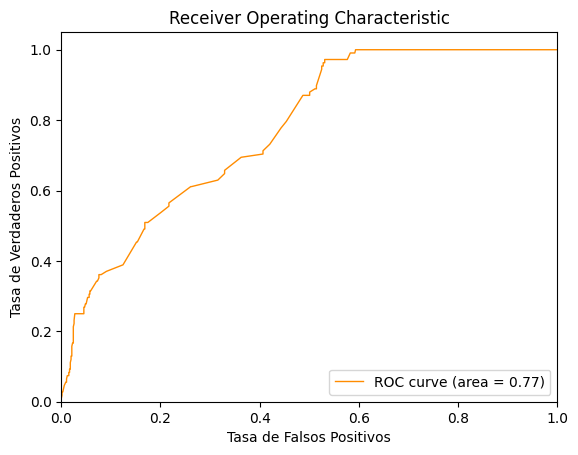

In [399]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Curva ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


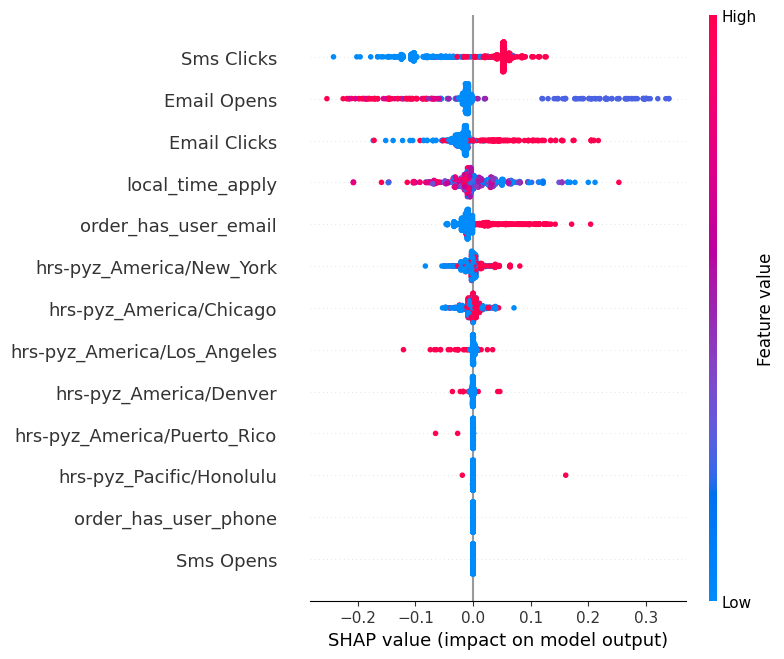

In [400]:
import shap

# Inicializar el explainer de SHAP
explainer = shap.TreeExplainer(rf)

# Calcular los SHAP values para todas las muestras en el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Visualizar el primer prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

# Visualizar el resumen para todo el conjunto de prueba
shap.summary_plot(shap_values[1], X_test)
